In [1]:
import pandas as pd

df = pd.read_csv('../data/processed/cost_response_data_design_input_weekly.csv')

df.head()

,date,geo,cost,response
0,2024-04-01,1,48.092110,4
1,2024-04-01,2,1019.147089,149
2,2024-04-01,3,8.775140,2
3,2024-04-01,4,16.464268,5
4,2024-04-01,5,10.839423,2


In [8]:

# 1. Calculate the sum per geo first
grouped_sums = df.groupby('geo')[['response']].sum()

# 2. Get descriptive statistics of the summed 'response' column
distribution_stats = grouped_sums['response'].describe()

print("Descriptive Statistics of Summed Responses per Geo:")
print(distribution_stats)

Descriptive Statistics of Summed Responses per Geo:
count     7940.000000
mean        31.347733
std        422.682537
min          1.000000
25%          2.000000
50%          5.000000
75%         14.000000
max      23838.000000
Name: response, dtype: float64


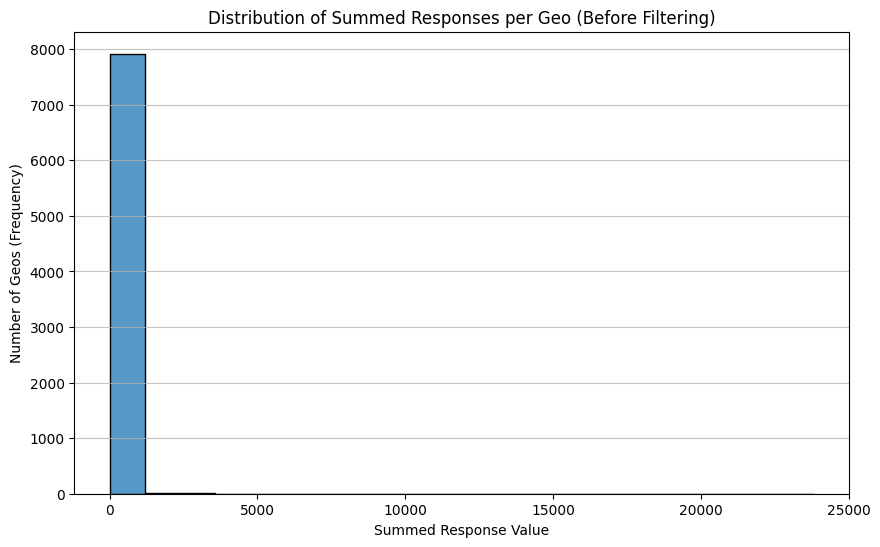

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns # Optional, for potentially nicer plots

# 1. Calculate the sum per geo first
grouped_sums = df.groupby('geo')[['response']].sum()

# 2. Create a histogram
plt.figure(figsize=(10, 6)) # Adjust figure size as needed

# Using Pandas plotting
# grouped_sums['response'].hist(bins=20) # Adjust number of bins as needed

# Or using Seaborn (often preferred)
sns.histplot(data=grouped_sums, x='response', bins=20) # Adjust number of bins

plt.title('Distribution of Summed Responses per Geo (Before Filtering)')
plt.xlabel('Summed Response Value')
plt.ylabel('Number of Geos (Frequency)')
plt.grid(axis='y', alpha=0.75)
plt.show()

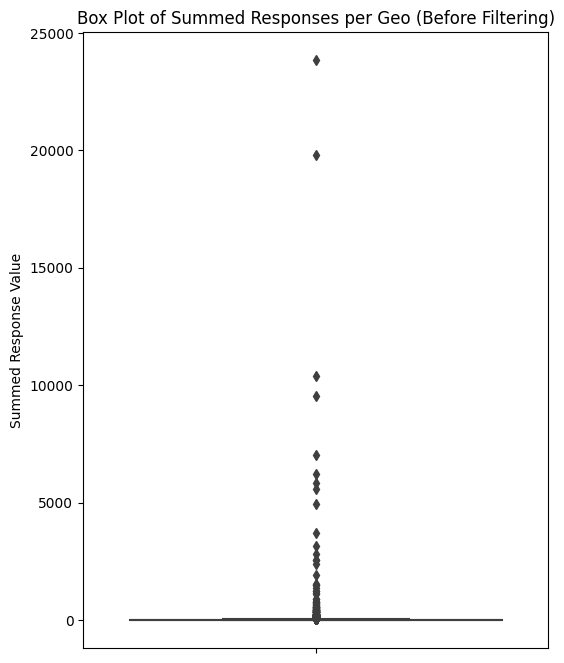

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Calculate the sum per geo first
grouped_sums = df.groupby('geo')[['response']].sum()

# 2. Create a box plot
plt.figure(figsize=(6, 8))
sns.boxplot(data=grouped_sums, y='response')
plt.title('Box Plot of Summed Responses per Geo (Before Filtering)')
plt.ylabel('Summed Response Value')
plt.show()



In [39]:
# Your original code
filtered_result = df.groupby('geo')[['response']].sum().sort_values('response', ascending=True)

# Add the filter
filtered_result = grouped_sorted[grouped_sorted['response'] < 15]

small_geos = filtered_result.index.to_numpy()
    
small_geos

array([5046, 1631, 6612, ...,  870, 6895, 1416])

In [40]:
reduced_dataset = df.loc[~df['geo'].isin(small_geos)]

reduced_dataset.shape

(39167, 4)

In [41]:
len(reduced_dataset.geo.unique())

1876

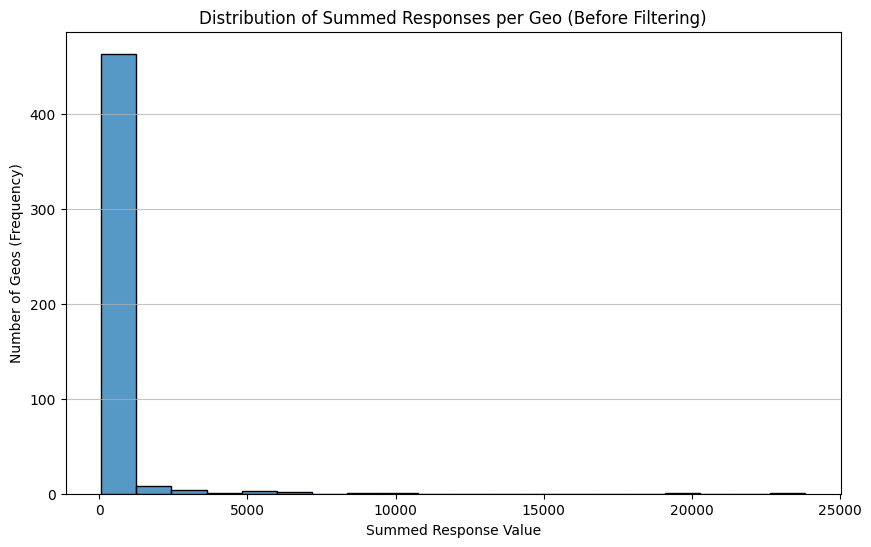

In [29]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns # Optional, for potentially nicer plots

# 1. Calculate the sum per geo first
grouped_sums = reduced_dataset.groupby('geo')[['response']].sum()

# 2. Create a histogram
plt.figure(figsize=(10, 6)) # Adjust figure size as needed

# Using Pandas plotting
# grouped_sums['response'].hist(bins=20) # Adjust number of bins as needed

# Or using Seaborn (often preferred)
sns.histplot(data=grouped_sums, x='response', bins=20) # Adjust number of bins

plt.title('Distribution of Summed Responses per Geo (Before Filtering)')
plt.xlabel('Summed Response Value')
plt.ylabel('Number of Geos (Frequency)')
plt.grid(axis='y', alpha=0.75)
plt.show()

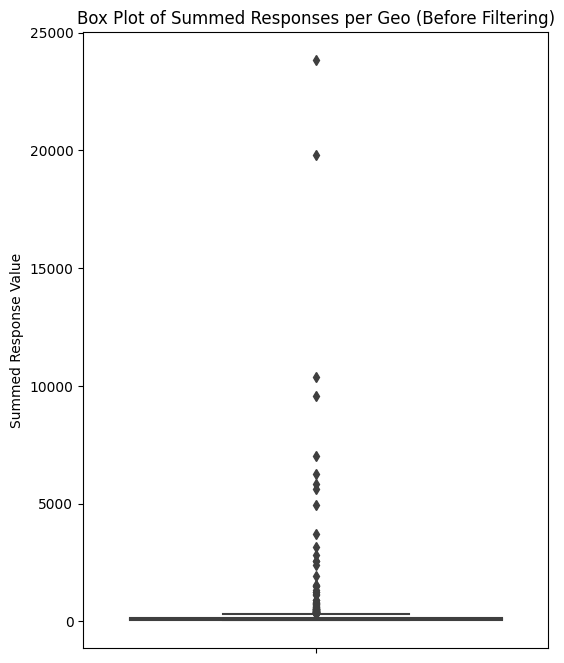

In [30]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Calculate the sum per geo first
grouped_sums = reduced_dataset.groupby('geo')[['response']].sum()

# 2. Create a box plot
plt.figure(figsize=(6, 8))
sns.boxplot(data=grouped_sums, y='response')
plt.title('Box Plot of Summed Responses per Geo (Before Filtering)')
plt.ylabel('Summed Response Value')
plt.show()



In [31]:

# 1. Calculate the sum per geo first
grouped_sums = reduced_dataset.groupby('geo')[['response']].sum()

# 2. Get descriptive statistics of the summed 'response' column
distribution_stats = grouped_sums['response'].describe()

print("Descriptive Statistics of Summed Responses per Geo:")
print(distribution_stats)

Descriptive Statistics of Summed Responses per Geo:
count      485.000000
mean       384.896907
std       1672.001590
min         50.000000
25%         62.000000
50%         89.000000
75%        161.000000
max      23838.000000
Name: response, dtype: float64


In [35]:
print(reduced_dataset.date.min())
print(reduced_dataset.date.max())


2024-04-01
2025-03-17


In [42]:
orders = pd.read_csv('../raw_data/orders.csv')

orders.head()

,sign_date,postal_code,city,households_signed_utc
0,2/18/2025,NaN,NaN,1
1,2/18/2025,03060,Nashua,1
2,2/18/2025,06370,Montville,1
3,2/18/2025,21209,Baltimore,1
4,2/18/2025,32792,Winter Park,1


In [46]:
orders.households_signed_utc.sum() * 3600 / df.response.sum()

256.03432690105706

In [48]:
df_wide = pd.read_csv('../data/processed/cost_response_data_wide_weekly.csv')

df_wide.head()

,Date,geo,City,State,DMA,sessions,fb_dma_cost,tiktok_state_cost,google_cost,city_dma_session_ratio,city_state_session_ratio,facebook_cost_city_normalized,tiktok_cost_city_normalized,total_cost,geo_id
0,2024-04-01,ABERDEEN,ABERDEEN,MD,BALTIMORE,1,37.783842,0.00,0.0,0.111111,0.045455,4.198205,0.000000,4.198205,467
1,2024-04-01,ABERDEEN,ABERDEEN,WA,SEATTLE-TACOMA,2,184.487864,29.25,0.0,0.057292,0.051975,11.051147,1.720104,12.771251,119
2,2024-04-01,ABILENE,ABILENE,KS,TOPEKA,1,4.299726,1.01,0.0,0.333333,0.066667,1.433242,0.067333,1.500575,712
3,2024-04-01,ACKERMAN,ACKERMAN,MS,COLUMBUS-TUPELO-W PNT-HSTN,2,4.229690,0.45,0.0,0.500000,0.571429,2.114845,0.252857,2.367702,713
4,2024-04-01,ACTON,ACTON,MA,BOSTON (MANCHESTER),3,0.000000,18.74,0.0,0.157895,0.157895,0.000000,2.958947,2.958947,1221
